In [1]:
from dypac import Dypac
from dypac.bascpp import stab_maps
import numpy as np
import matplotlib.pyplot as plt
from nilearn.input_data import NiftiMasker
from nilearn import plotting
from dypac_utils import load_dypac, load_r2_intra, load_r2_inter, load_r2_other, mean_r2, mean_inter_r2
from sklearn.preprocessing import StandardScaler

# Load test-retest parcels for one subject

In [2]:
subject = 'sub-03'
fwhm = '5'
cluster = 300
state = 900
root_data = '/data/cisl/pbellec/cneuromod_embeddings/xp_202011/'
model, mask_img = load_dypac(subject=subject, root_data=root_data, fwhm=fwhm, cluster=cluster, 
    state=state, batch='even')

In [3]:
model2, mask_img = load_dypac(subject=subject, root_data=root_data, fwhm=fwhm, cluster=cluster, 
    state=state, batch='odd')

# Build common mask

In [4]:
from nilearn.image import math_img
mask_img = math_img("img1 + img2 > 0", img1=model.masker_.mask_img, img2=model2.masker_.mask_img)

# Resample and normalize parcels in a common space

In [18]:
scaler = StandardScaler()
x = model.components_.todense()
img_parcels = model.masker_.inverse_transform(x)
masker = NiftiMasker(standardize=False, detrend=False, mask_img=mask_img)
xn = scaler.fit_transform(masker.fit_transform(img_parcels))

In [19]:
scaler2 = StandardScaler()
y = model2.components_.todense()
img_parcels2 = model2.masker_.inverse_transform(y)
yn = scaler2.fit_transform(masker.fit_transform(img_parcels2))

# Match parcels

In [20]:
R = np.matmul(xn, yn.transpose())

In [22]:
R.shape

(900, 900)

In [9]:
import matplotlib.pyplot as plt

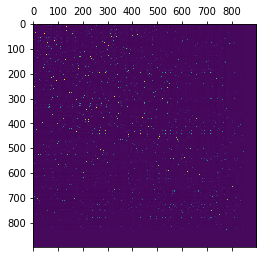

In [15]:
plt.matshow(R)

(array([ 70., 165., 304., 191.,  92.,  45.,  14.,  11.,   5.,   3.]),
 array([  1020.16343564,  32711.02364474,  64401.88385384,  96092.74406294,
        127783.60427203, 159474.46448113, 191165.32469023, 222856.18489933,
        254547.04510843, 286237.90531753, 317928.76552662]),
 <BarContainer object of 10 artists>)

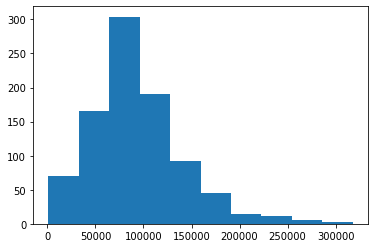

In [21]:
match_val = np.max(R, axis=1)
plt.hist(match_val)